In [1]:
import numpy as np
import pandas as pd 

import os

#Importing dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv('/kaggle/input/employee-attrition-dataset/train.csv')
df.head()

/kaggle/input/employee-attrition-dataset/train.csv
/kaggle/input/employee-attrition-dataset/test.csv


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


# Exploratory Data Analysis

In [2]:
#Delete unused columns
df.drop('Employee ID', axis=1, inplace=True)

#Collect category data
cat = df.select_dtypes(include='object').columns.tolist()

#Display unique values for each category data
for i in cat:
    print("Nilai unik untuk kolom", i, "adalah =", df[i].unique())

Nilai unik untuk kolom Gender adalah = ['Male' 'Female']
Nilai unik untuk kolom Job Role adalah = ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Nilai unik untuk kolom Work-Life Balance adalah = ['Excellent' 'Poor' 'Good' 'Fair']
Nilai unik untuk kolom Job Satisfaction adalah = ['Medium' 'High' 'Very High' 'Low']
Nilai unik untuk kolom Performance Rating adalah = ['Average' 'Low' 'High' 'Below Average']
Nilai unik untuk kolom Overtime adalah = ['No' 'Yes']
Nilai unik untuk kolom Education Level adalah = ['Associate Degree' 'Master’s Degree' 'Bachelor’s Degree' 'High School'
 'PhD']
Nilai unik untuk kolom Marital Status adalah = ['Married' 'Divorced' 'Single']
Nilai unik untuk kolom Job Level adalah = ['Mid' 'Senior' 'Entry']
Nilai unik untuk kolom Company Size adalah = ['Medium' 'Small' 'Large']
Nilai unik untuk kolom Remote Work adalah = ['No' 'Yes']
Nilai unik untuk kolom Leadership Opportunities adalah = ['No' 'Yes']
Nilai unik untuk kolom Innovation Opportunities adalah 

In [3]:
#Importing libraries for EDA visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

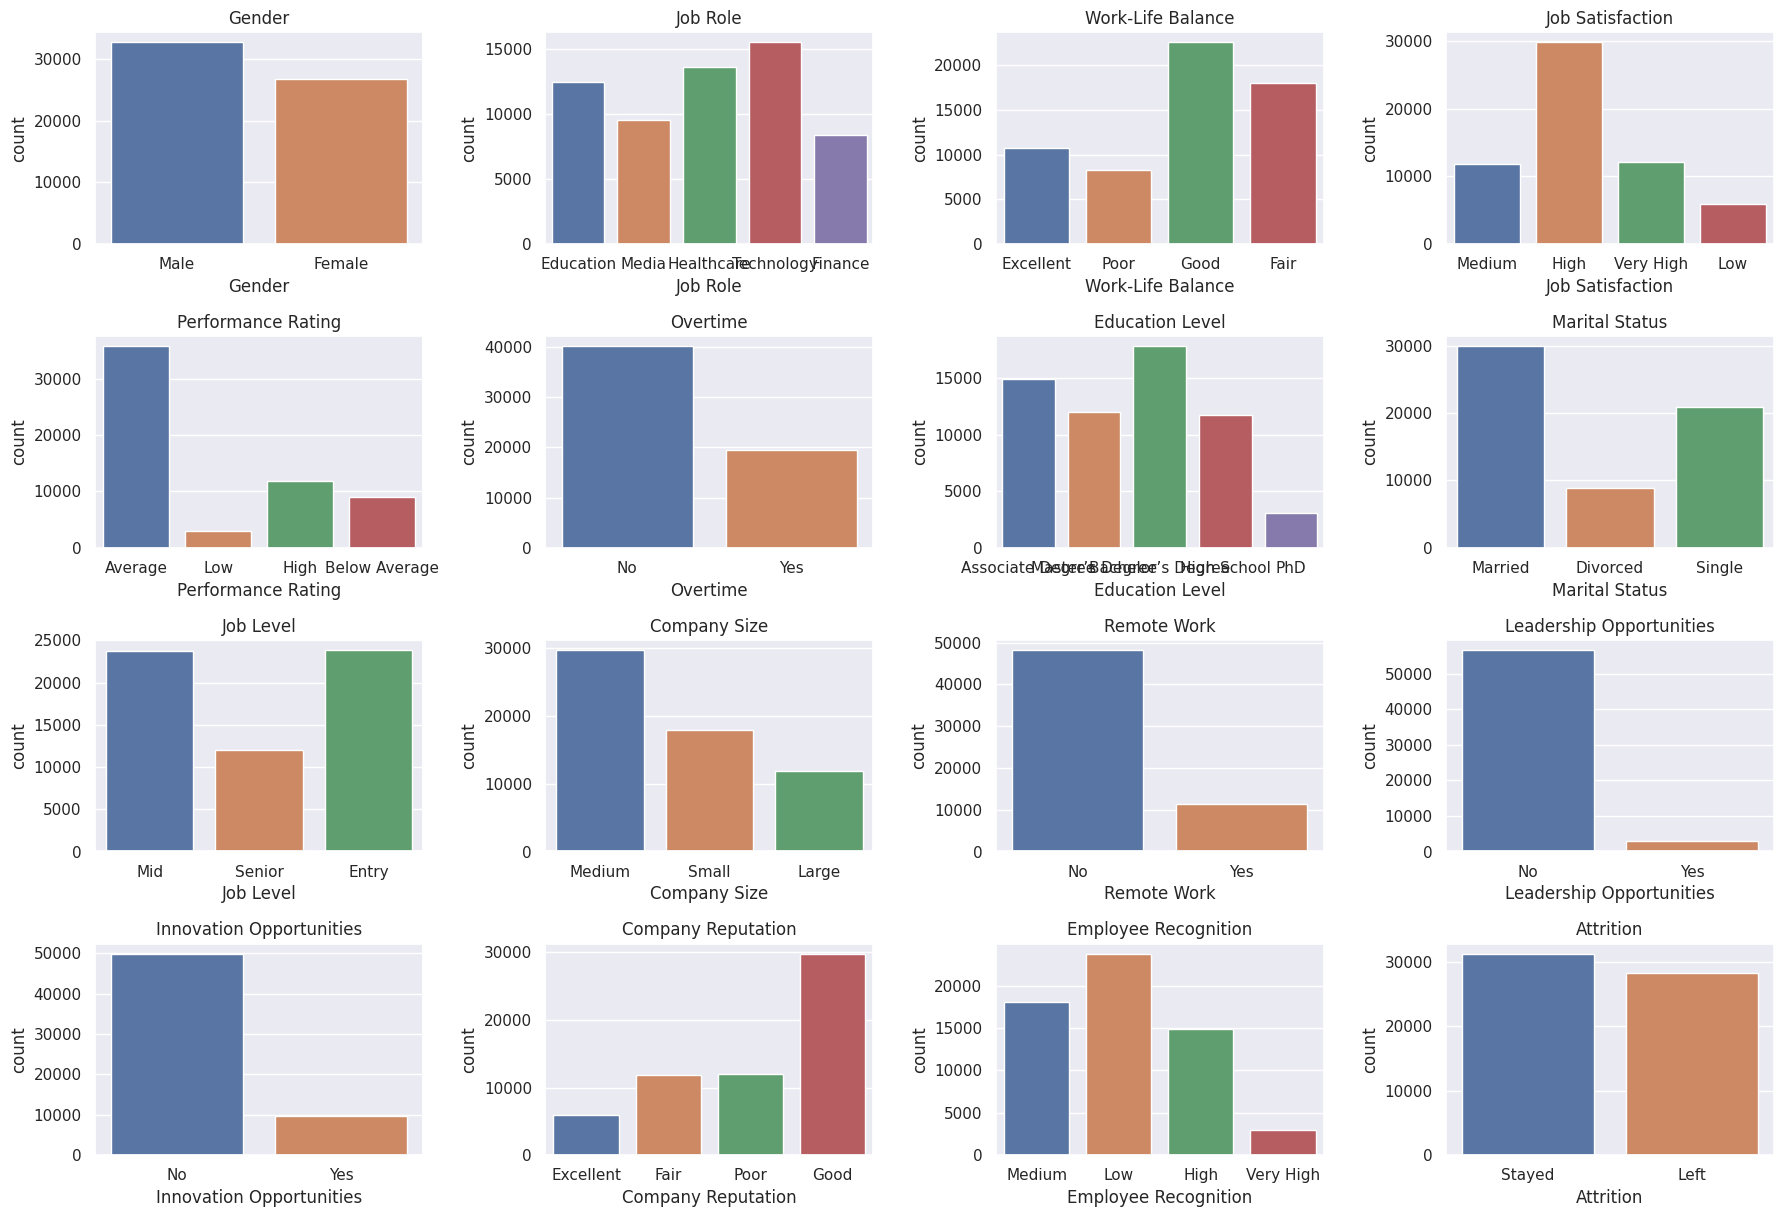

In [4]:
#Visualization of the number of unique values for each data category
num_cols = len(cat)
num_rows = (num_cols+2)//2
fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(18,3*num_rows))
axs = axs.flatten()

for i, var in enumerate(cat):
    sns.countplot(x=var, data=df, ax=axs[i])
    axs[i].set_title(var)

if num_cols<len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

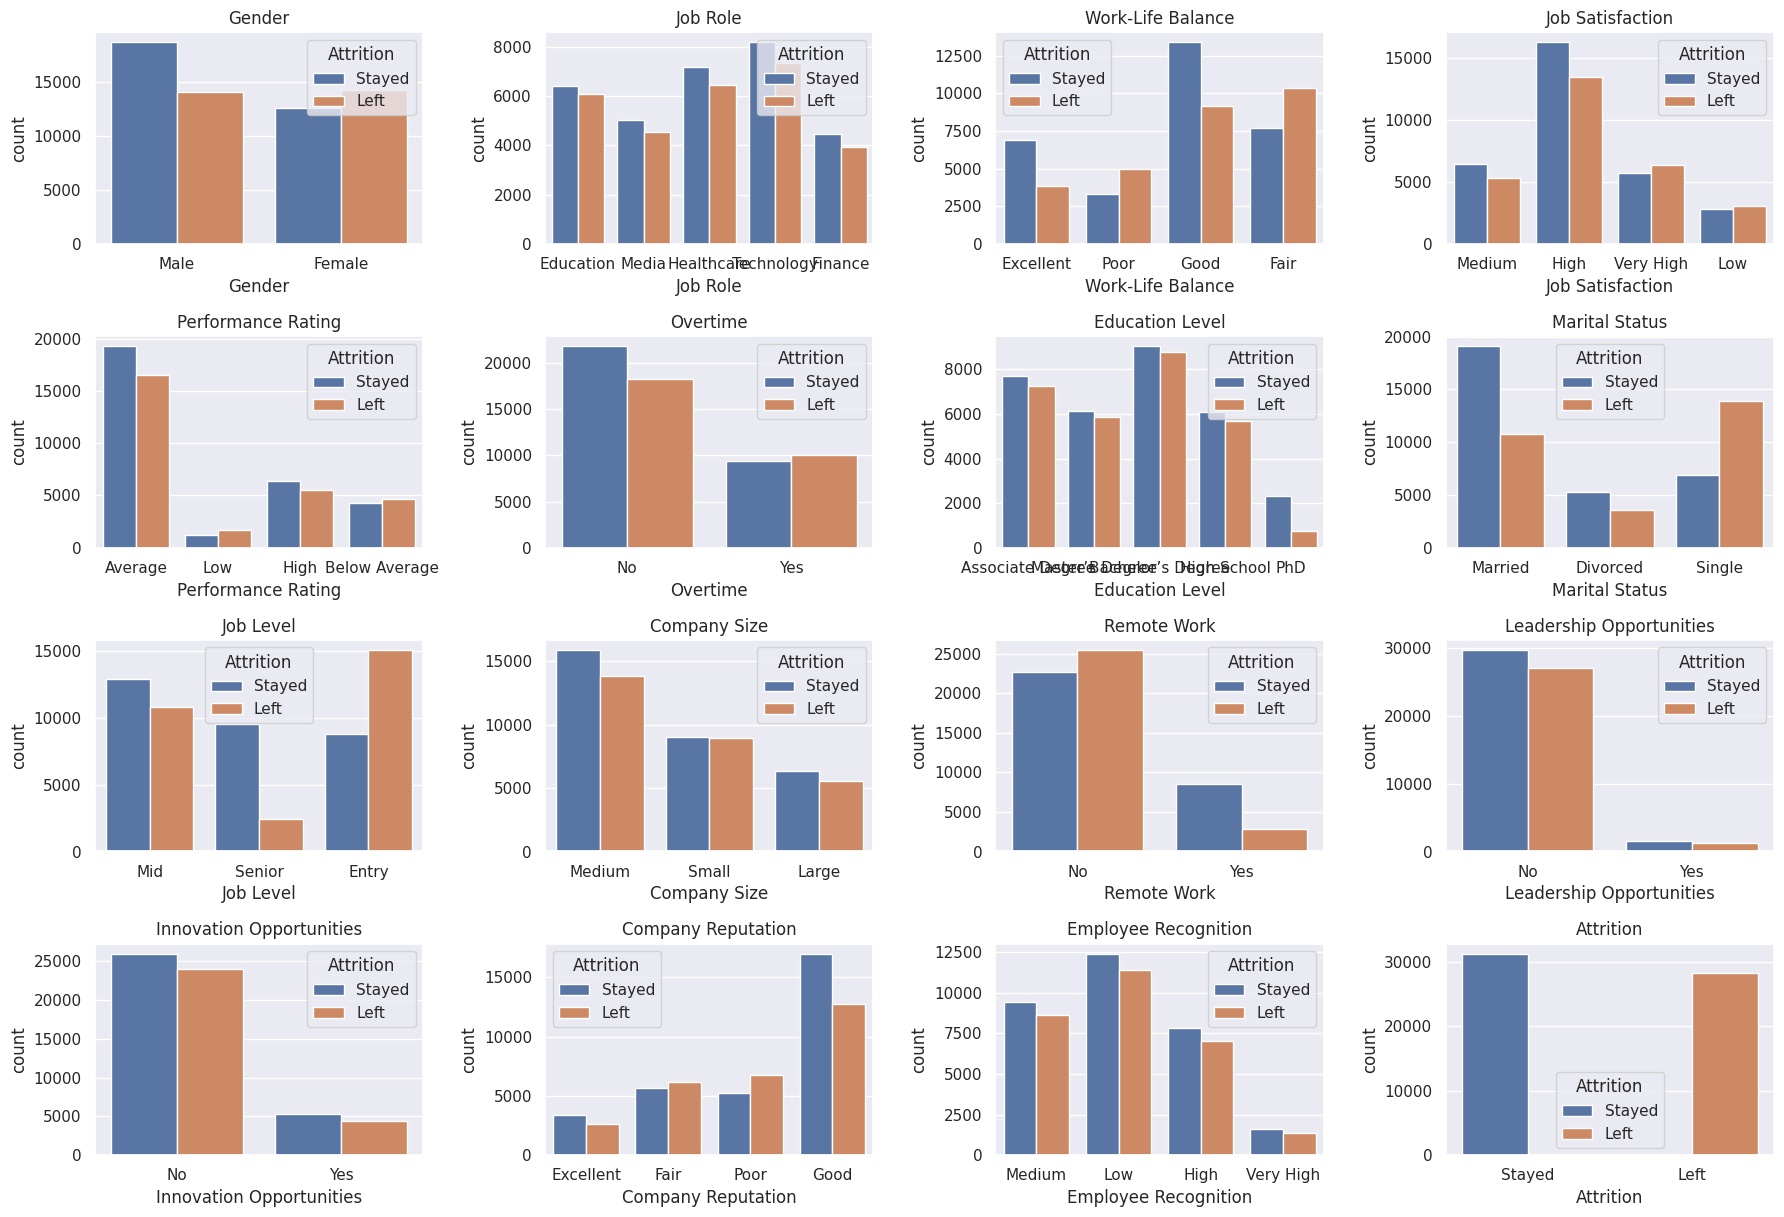

In [5]:
#Visualization of the number of unique values ​​for each data category based on "Attrition" status
num_cols = len(cat)
num_rows = (num_cols+2)//2
fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(18,3*num_rows))
axs = axs.flatten()

for i, var in enumerate(cat):
    sns.countplot(x=var, data=df, hue='Attrition', ax=axs[i])
    axs[i].set_title(var)

if num_cols<len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

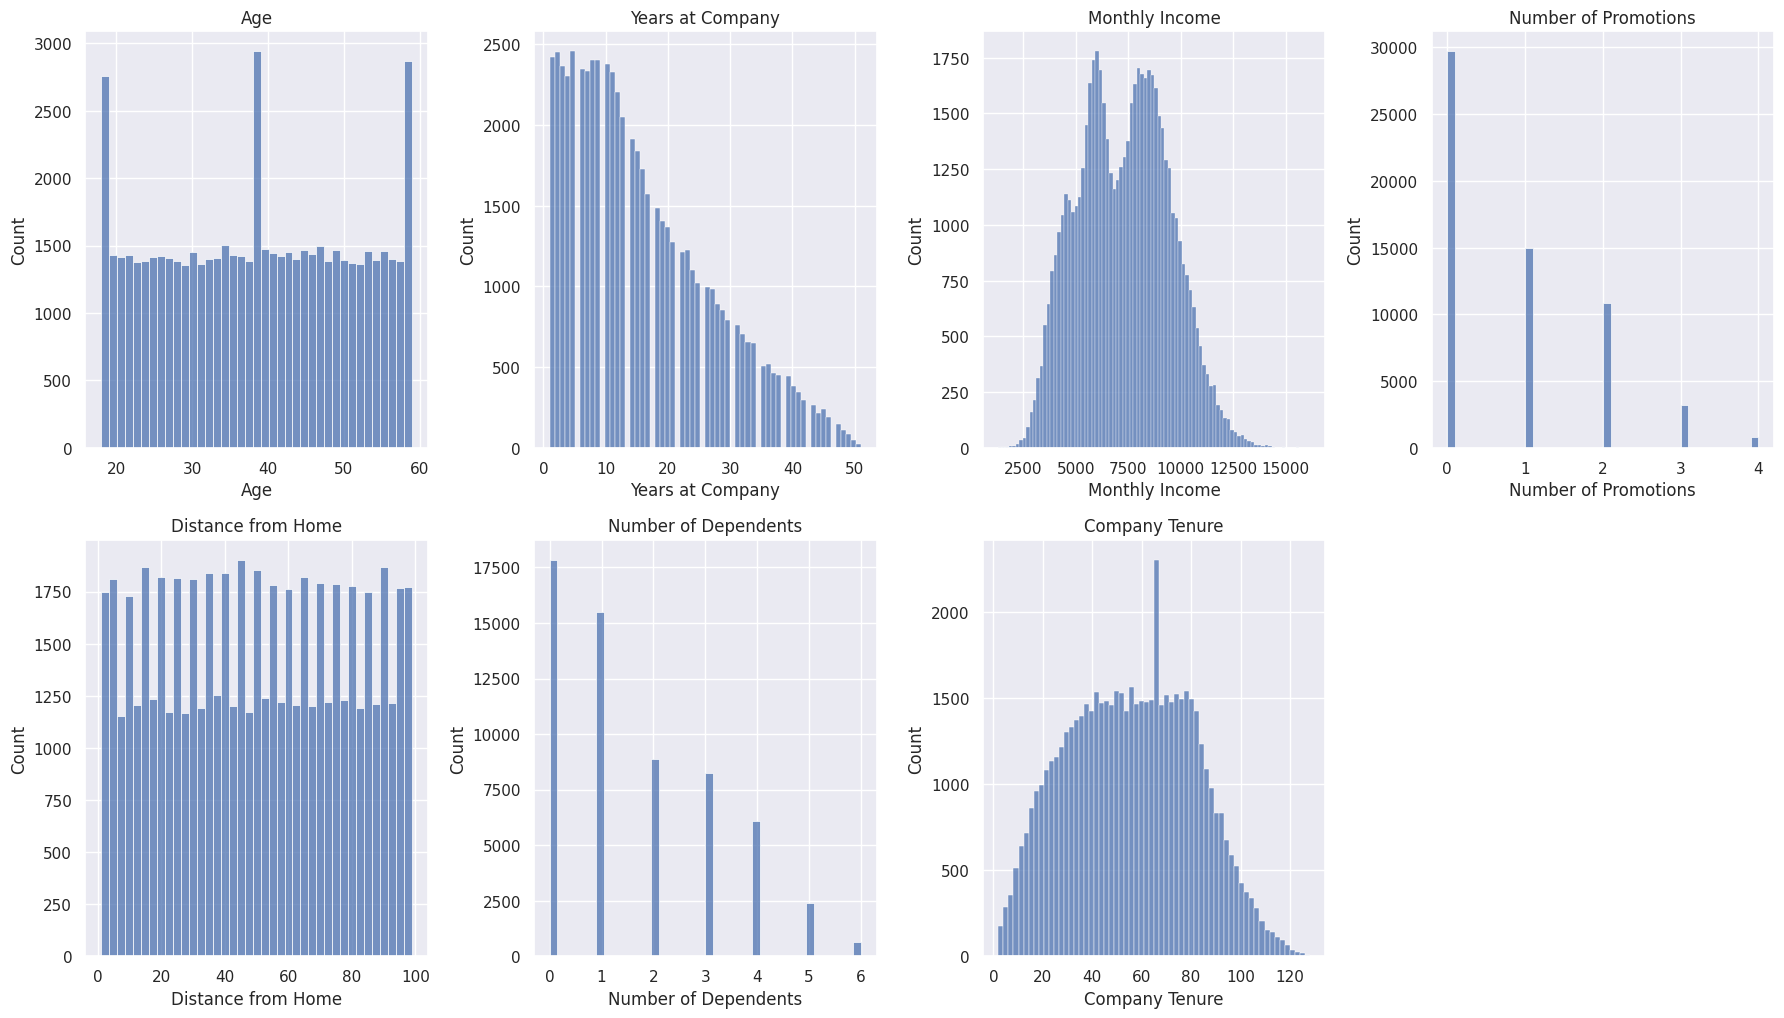

In [6]:
#Visualization of data distribution for each numerical variable
#First, we want to see their distribution by using histogram
num = df.select_dtypes(include='number').columns.tolist()

num_cols = len(num)
num_rows = (num_cols+2)//2
fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(18,5*num_rows))
axs = axs.flatten()

for i, var in enumerate(num):
    sns.histplot(x=var, data=df, ax=axs[i])
    axs[i].set_title(var)

if num_cols<len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

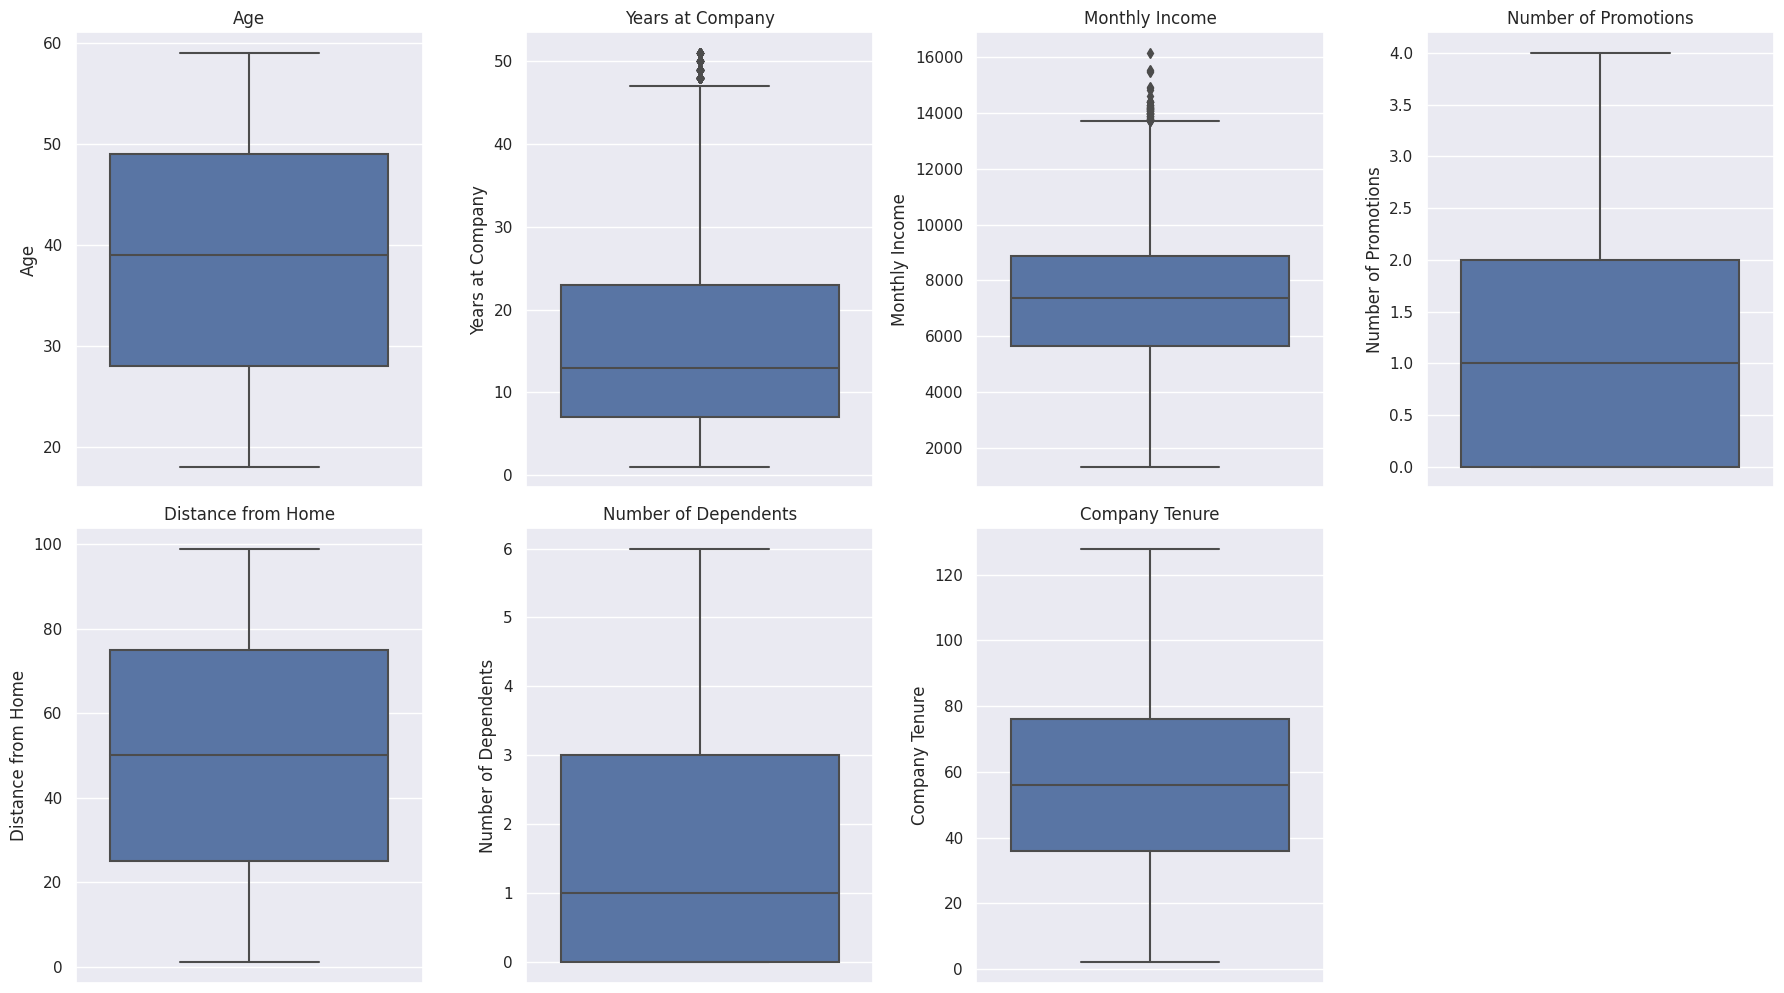

In [7]:
#Visualization of data distribution for each numerical variable
#In this part, we want to see their distribution by using boxplot
num_cols = len(num)
num_rows = (num_cols+2)//2
fig, axs = plt.subplots(nrows=num_rows, ncols=4, figsize=(18,5*num_rows))
axs = axs.flatten()

for i, var in enumerate(num):
    sns.boxplot(y=var, data=df, ax=axs[i])
    axs[i].set_title(var)

if num_cols<len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

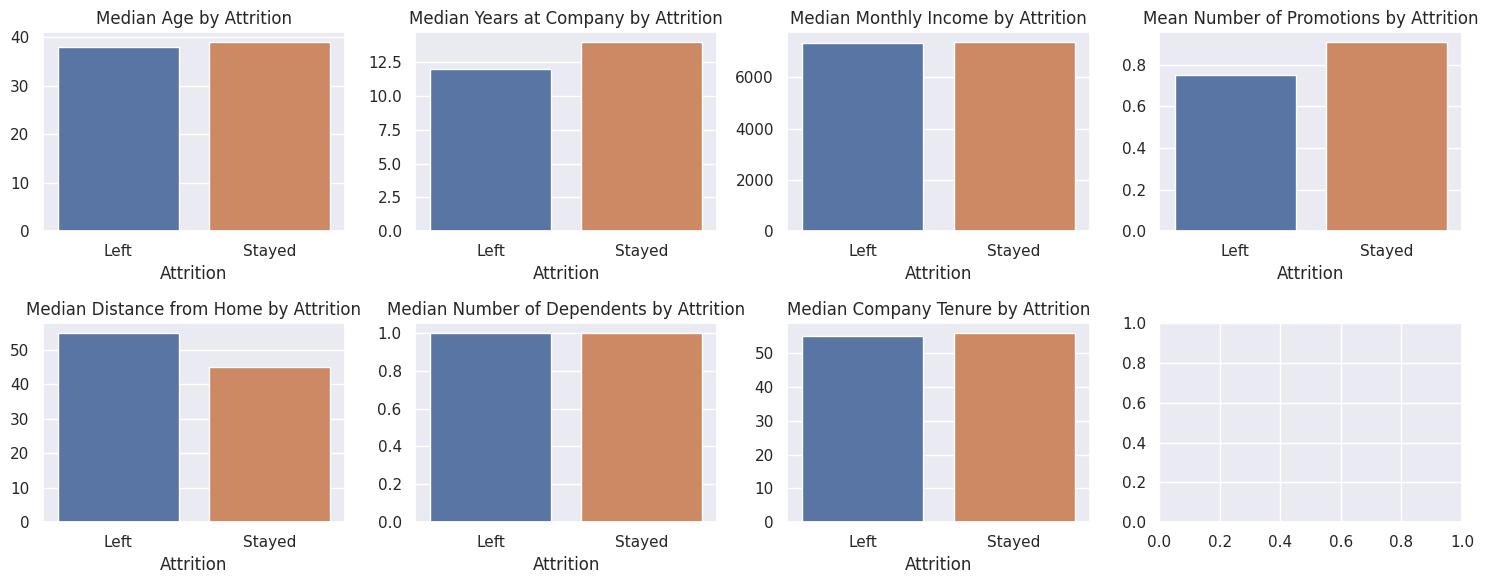

In [8]:
#Visualization of the mean and median of numeric data based on the "Attrition"
#We want to explore wheter there are significant differences for each numerical data by attrition
fig, axs = plt.subplots(2,4, figsize=(15,6))
data = df.groupby('Attrition')['Age'].median()
sns.barplot(x=data.index, y=data.values, ax=axs[0,0])
axs[0,0].set_title("Median Age by Attrition")

data = df.groupby('Attrition')['Years at Company'].median()
sns.barplot(x=data.index, y=data.values, ax=axs[0,1])
axs[0,1].set_title("Median Years at Company by Attrition")

data = df.groupby('Attrition')['Monthly Income'].median()
sns.barplot(x=data.index, y=data.values, ax=axs[0,2])
axs[0,2].set_title("Median Monthly Income by Attrition")

data = df.groupby('Attrition')['Number of Promotions'].mean()
sns.barplot(x=data.index, y=data.values, ax=axs[0,3])
axs[0,3].set_title("Mean Number of Promotions by Attrition")

data = df.groupby('Attrition')['Distance from Home'].median()
sns.barplot(x=data.index, y=data.values, ax=axs[1,0])
axs[1,0].set_title("Median Distance from Home by Attrition")

data = df.groupby('Attrition')['Number of Dependents'].median()
sns.barplot(x=data.index, y=data.values, ax=axs[1,1])
axs[1,1].set_title("Median Number of Dependents by Attrition")

data = df.groupby('Attrition')['Company Tenure'].median()
sns.barplot(x=data.index, y=data.values, ax=axs[1,2])
axs[1,2].set_title("Median Company Tenure by Attrition")

plt.tight_layout()
plt.show()

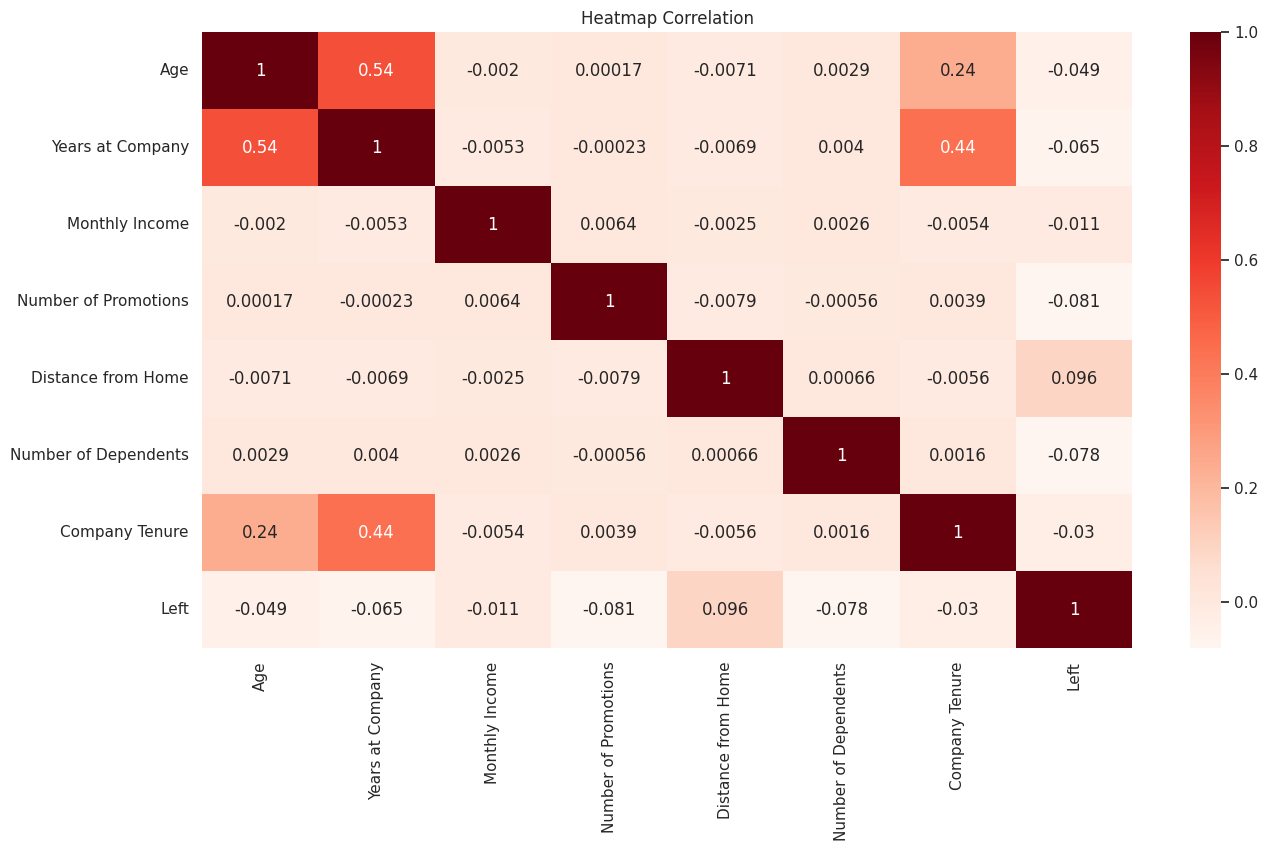

In [9]:
#Change the "Attrition" column to "Left"
df['Left'] = df['Attrition'].map({'Stayed':0, 'Left':1})

#Create a visualization using correlation matrix to see the correlation between numerical variables
korelasi = df.select_dtypes(include='number').corr() 
plt.figure(figsize=(15,8))
sns.heatmap(korelasi, annot=True, cmap='Reds')
plt.title("Heatmap Correlation")
plt.show()

# Data Preprocessing

In [10]:
#Display unique values for each category data
for i in cat:
    print("Nilai unik untuk kolom", i, "adalah =", df[i].unique())

Nilai unik untuk kolom Gender adalah = ['Male' 'Female']
Nilai unik untuk kolom Job Role adalah = ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Nilai unik untuk kolom Work-Life Balance adalah = ['Excellent' 'Poor' 'Good' 'Fair']
Nilai unik untuk kolom Job Satisfaction adalah = ['Medium' 'High' 'Very High' 'Low']
Nilai unik untuk kolom Performance Rating adalah = ['Average' 'Low' 'High' 'Below Average']
Nilai unik untuk kolom Overtime adalah = ['No' 'Yes']
Nilai unik untuk kolom Education Level adalah = ['Associate Degree' 'Master’s Degree' 'Bachelor’s Degree' 'High School'
 'PhD']
Nilai unik untuk kolom Marital Status adalah = ['Married' 'Divorced' 'Single']
Nilai unik untuk kolom Job Level adalah = ['Mid' 'Senior' 'Entry']
Nilai unik untuk kolom Company Size adalah = ['Medium' 'Small' 'Large']
Nilai unik untuk kolom Remote Work adalah = ['No' 'Yes']
Nilai unik untuk kolom Leadership Opportunities adalah = ['No' 'Yes']
Nilai unik untuk kolom Innovation Opportunities adalah 

In [11]:
#Label encoder can be applied for nominal category because it doesnt have an inherent order or ranking among its categorie.
#In this case we apply it on "Job Role" & "Marital Status" columns

from sklearn.preprocessing import LabelEncoder #Import library for encoding
kolom = ['Job Role', 'Marital Status'] #Collect selected columns
encoder = LabelEncoder()

#Apply label encoder for the selected columns
for i in kolom:
    df[i] = encoder.fit_transform(df[i])

In [12]:
#Encoding for binary category
#Collect selected columns for binary encoding
kolom = ['Overtime', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities']

for column in kolom:
    df[column] = df[column].map({'Yes':1, 'No':0})

df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition,Left
0,31,Male,19,0,5390,Excellent,Medium,Average,2,0,...,Mid,Medium,89,0,0,0,Excellent,Medium,Stayed,0
1,59,Female,4,3,5534,Poor,High,Low,3,0,...,Mid,Medium,21,0,0,0,Fair,Low,Stayed,0
2,24,Female,10,2,8159,Good,High,Low,0,0,...,Mid,Medium,74,0,0,0,Poor,Low,Stayed,0
3,36,Female,7,0,3989,Good,High,High,1,0,...,Mid,Small,50,1,0,0,Good,Medium,Stayed,0
4,56,Male,41,0,4821,Fair,Very High,Average,0,1,...,Senior,Medium,68,0,0,0,Fair,Medium,Stayed,0


In [13]:
#Encoding for ordinal category
#Ordinal categories are used for data that needs to be sorted or ranked, making it possible to make comparisons between categories
kolom = ['Work-Life Balance', 'Company Reputation'] #Collect selected column

for column in kolom:
    df[column] = df[column].map({"Poor":0, "Fair":1, "Good":2, "Excellent":3})

df[kolom].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Work-Life Balance   59598 non-null  int64
 1   Company Reputation  59598 non-null  int64
dtypes: int64(2)
memory usage: 931.3 KB


In [14]:
#Encoding for ordinal category
kolom = ['Job Satisfaction', 'Employee Recognition'] #Collect selected columns

for i in kolom:
    df[i] = df[i].map({"Low":0, "Medium":1, "High":2, "Very High":3})

In [15]:
#Encoding for ordinal category
df['Gender'] = df['Gender'].map({"Female":0, "Male":1})
df['Performance Rating'] = df['Performance Rating'].map({"Low":0, "Below Average":1, "Average":2, "High":3})
df['Education Level'] = df['Education Level'].map({"Associate Degree":0, "High School":1, "Bachelor’s Degree":2, "Master’s Degree":3,
                                                  "PhD":4})
df['Job Level'] = df['Job Level'].map({"Entry":0, "Mid":1, "Senior":2})
df['Company Size'] = df['Company Size'].map({"Small":0, "Medium":1, "Large":2})

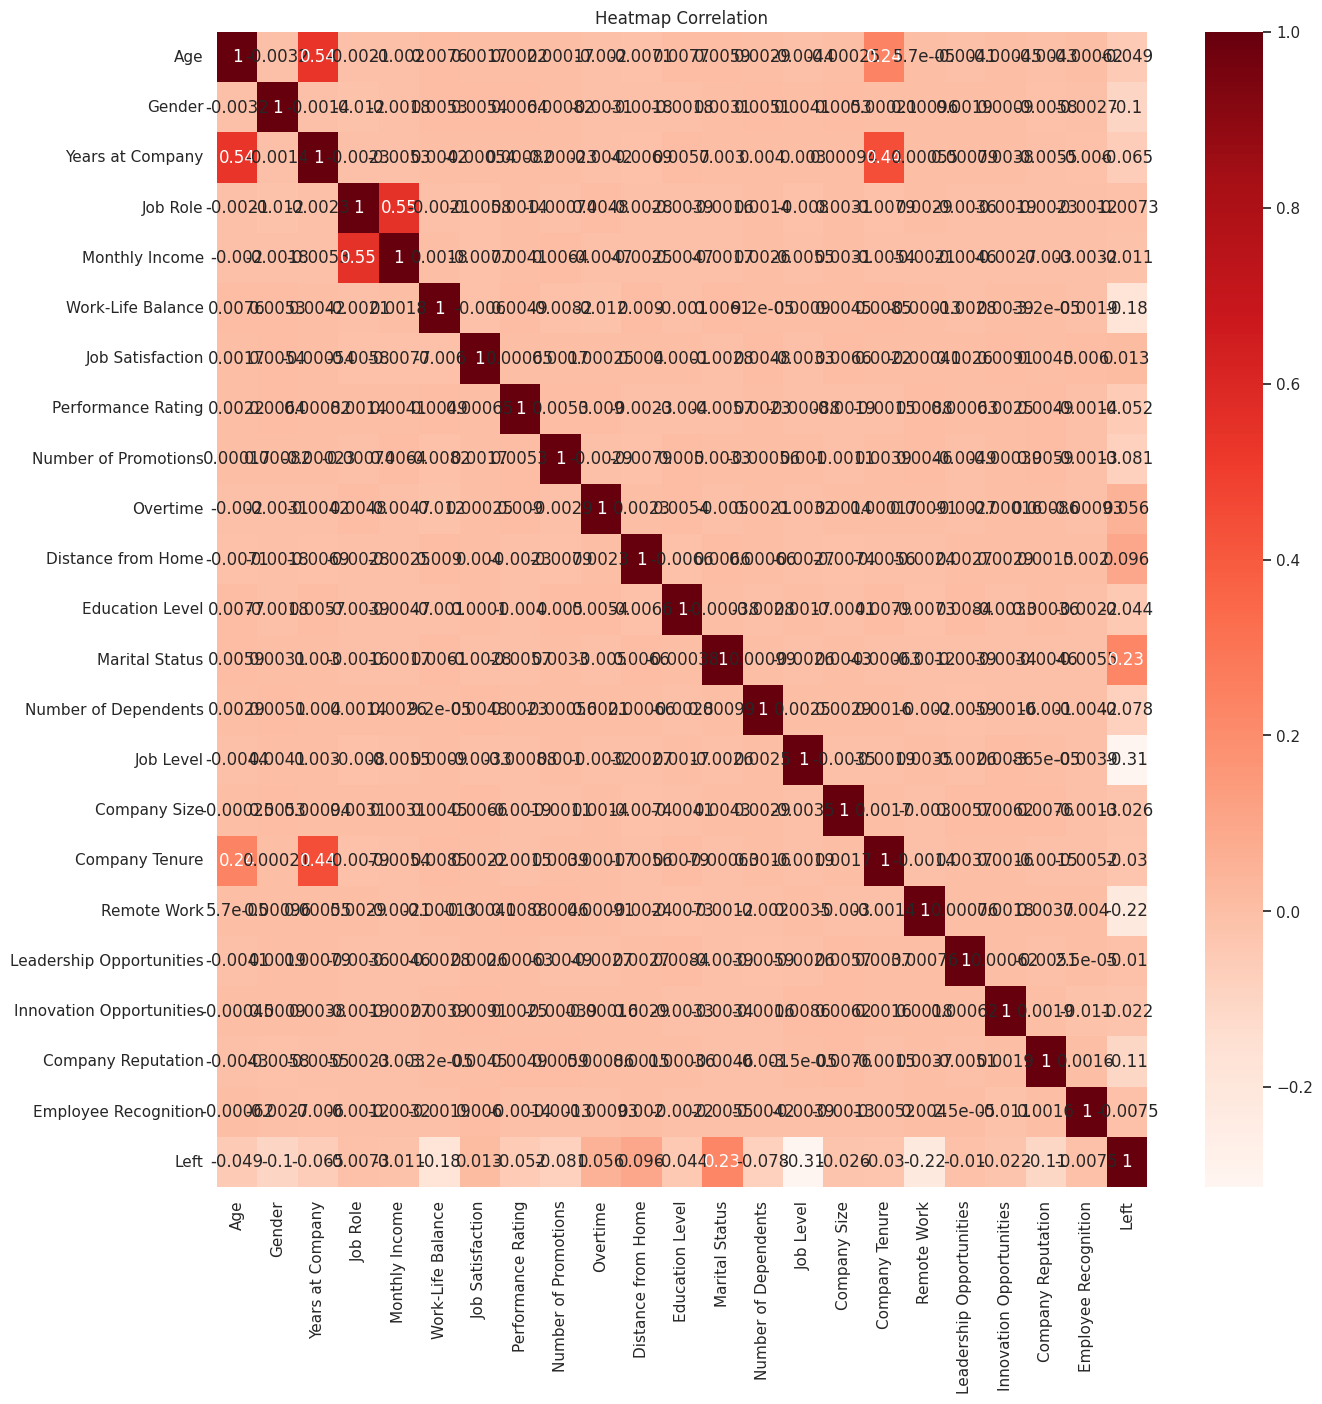

In [16]:
#Drop unused column
df.drop(columns=['Attrition'], inplace=True)

#Create correlation matrix visualization after encoding
korelasi = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(korelasi, annot=True, cmap='Reds')
plt.title("Heatmap Correlation")
plt.show()

In [17]:
#Split the dataset into features and target
X = df.drop("Left", axis=1)
y = df['Left']

# Machine Learning

In [18]:
#Import libraries for modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
from sklearn.model_selection import learning_curve, cross_val_score, train_test_split, GridSearchCV
import numpy as np

## Decision Tree

In [19]:
#Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

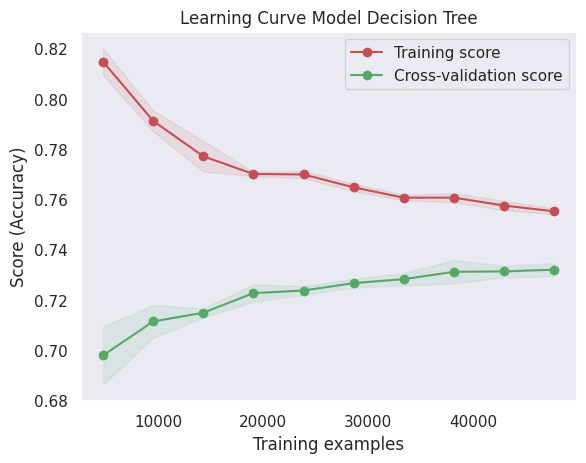

In [20]:
#Initializing Decision Tree Model
dtree = DecisionTreeClassifier(max_depth=9)

# Generating learning curves
# train_sizes: The proportions of the dataset to be used to generate the learning curve
# train_scores: The accuracy scores on the training sets
# test_scores: The accuracy scores on the cross-validation sets
train_sizes, train_scores, test_scores = learning_curve(dtree, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculating the mean and standard deviation of the training scores and the testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.figure()
plt.title("Learning Curve Model Decision Tree")
plt.xlabel("Training examples")
plt.ylabel("Score (Accuracy)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [21]:
#Initializing and fitting the Decision Tree Model
dtree = DecisionTreeClassifier(max_depth=9).fit(X_train, y_train)

#Calculating the accuracy in training and testing
print("Training accuracy =", dtree.score(X_train, y_train))
print("Testing accuracy =", dtree.score(X_test, y_test))

Training accuracy = 0.7568435687233328
Testing accuracy = 0.72751677852349


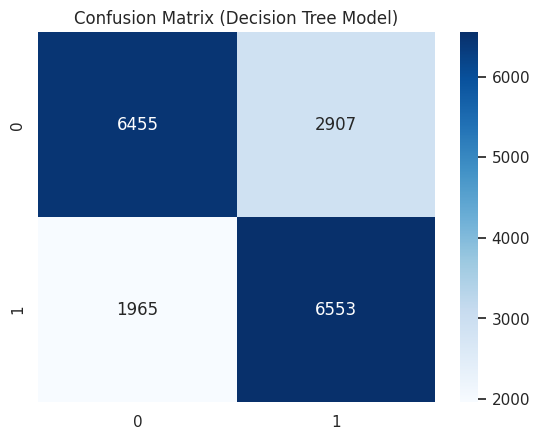

In [22]:
#Make a prediction using Decision Tree
y_pred = dtree.predict(X_test)

#Creat a confusion matrix to evaluate the model
cmatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cmatrix, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (Decision Tree Model)")
plt.show()

In [23]:
#Display the classification report for Decision Tree Model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73      9362
           1       0.69      0.77      0.73      8518

    accuracy                           0.73     17880
   macro avg       0.73      0.73      0.73     17880
weighted avg       0.73      0.73      0.73     17880



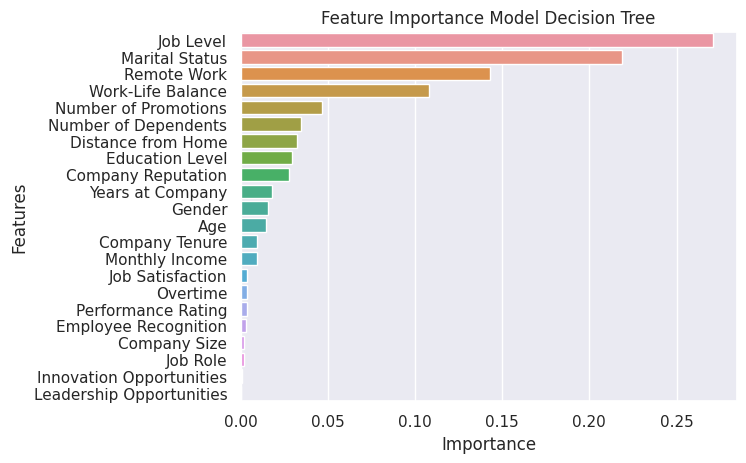

In [24]:
#Feature importance 
#Feature importance is an analysis technique used in various fields such as machine learning and statistics
#to identify which features or variables have the most significant impact on a particular outcome or prediction

#Extract feature importances
imp = pd.DataFrame()
imp['Features'] = X.columns
imp['Importance'] = dtree.feature_importances_
imp = imp.sort_values(by='Importance', ascending=False)

#Plot the feature importances
sns.barplot(imp, y='Features', x='Importance')
plt.title("Feature Importance Model Decision Tree")
plt.show()

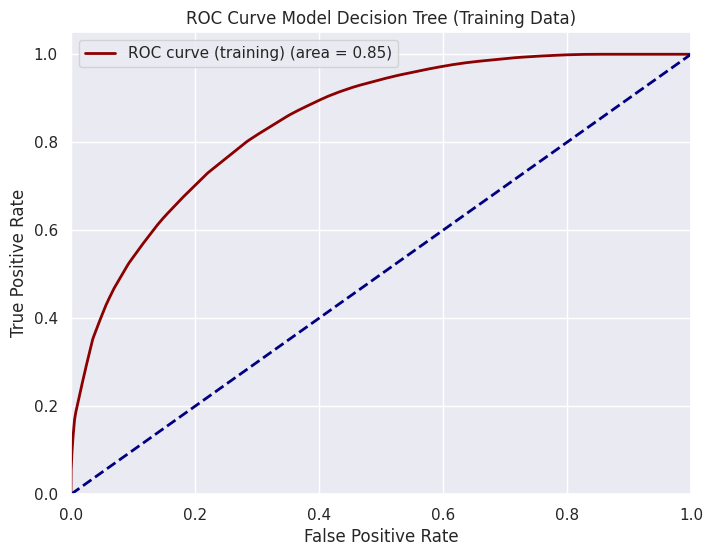

In [25]:
#Create roc analysis for Decision Tree Model on training set
y_pred_prob_train = dtree.predict_proba(X_train)[:, 1]

fpr_train, tpr_train, _train = roc_curve(y_train, y_pred_prob_train)
roc_auc_train = auc(fpr_train, tpr_train)

#Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkred', lw=2, label='ROC curve (training) (area = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model Decision Tree (Training Data)')
plt.legend(loc='best')

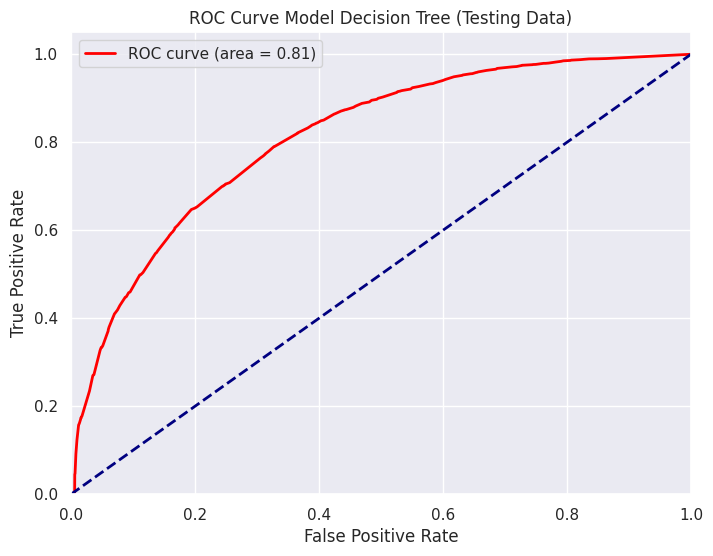

In [26]:
#Create ROC analysis for Decision Tree Model on testing set
y_pred_prob = dtree.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model Decision Tree (Testing Data)')
plt.legend(loc='upper left')
plt.show()

## Random Forest

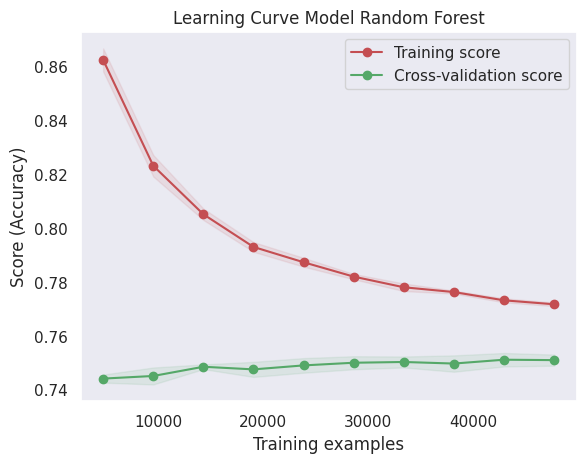

In [27]:
#Initializing Random Forest Model
rf = RandomForestClassifier(max_depth=9, n_estimators=100)

# Generating learning curves
# train_sizes: The proportions of the dataset to be used to generate the learning curve
# train_scores: The accuracy scores on the training sets
# test_scores: The accuracy scores on the cross-validation sets
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculating the mean and standard deviation of the training scores and the testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#Plotting the learning curve
plt.figure()
plt.title("Learning Curve Model Random Forest")
plt.xlabel("Training examples")
plt.ylabel("Score (Accuracy)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [28]:
#Initializing and fitting the Random Forest Model
rf = RandomForestClassifier(max_depth=9, n_estimators=100).fit(X_train, y_train)

#Calculating the accuracy in training and testing
print("Training accuracy =", rf.score(X_train, y_train))
print("Testing accuracy =", rf.score(X_test, y_test))

Training accuracy = 0.7760439138980776
Testing accuracy = 0.7479306487695749


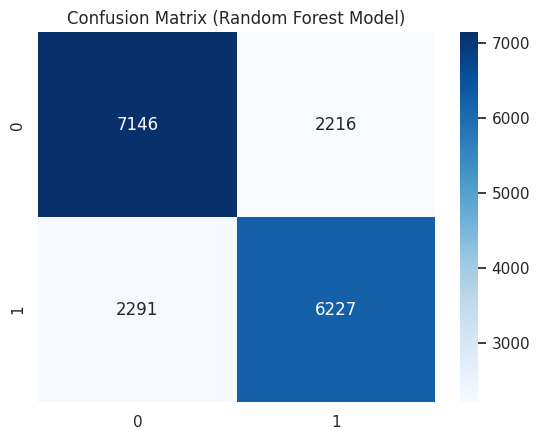

In [29]:
#Make a prediction using Decision Tree
y_pred = rf.predict(X_test)

#Creat a confusion matrix to evaluate the model
cmatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cmatrix, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix (Random Forest Model)")
plt.show()

In [30]:
#Display the classification report for Random Forest
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      9362
           1       0.74      0.73      0.73      8518

    accuracy                           0.75     17880
   macro avg       0.75      0.75      0.75     17880
weighted avg       0.75      0.75      0.75     17880



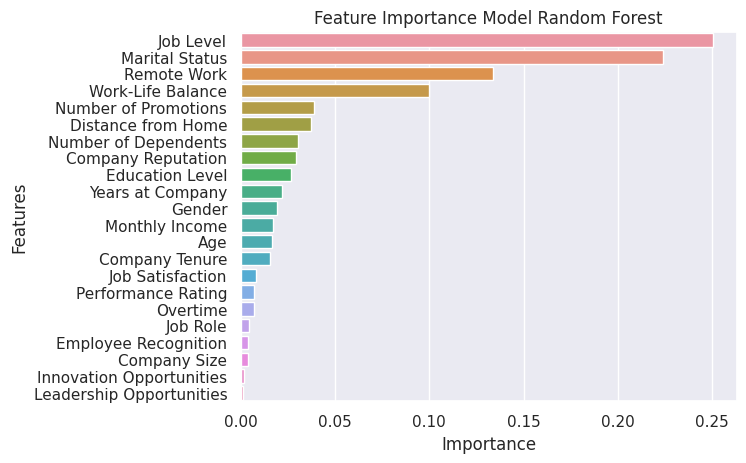

In [31]:
#Extract feature importances
imp = pd.DataFrame()
imp['Features'] = X.columns
imp['Importance'] = rf.feature_importances_
imp = imp.sort_values(by='Importance', ascending=False)

#Plot the feature importances
sns.barplot(imp, y='Features', x='Importance')
plt.title("Feature Importance Model Random Forest")
plt.show()

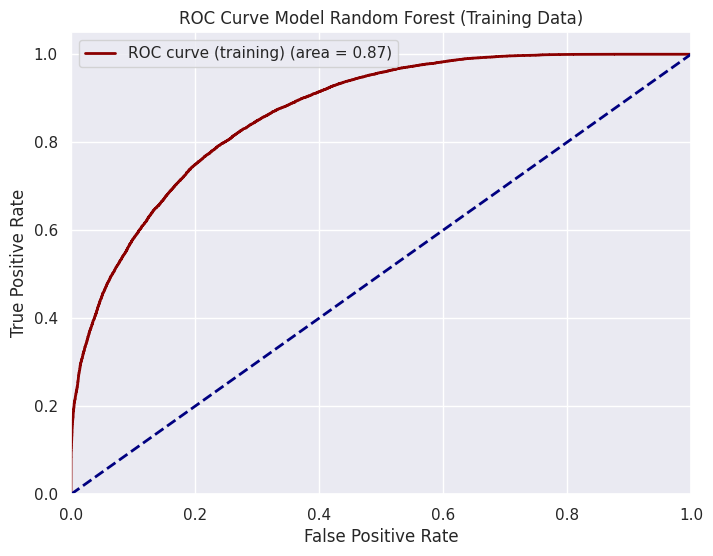

In [32]:
#Create roc analysis for Decision Tree Model on training set
y_pred_prob_train = rf.predict_proba(X_train)[:, 1]

fpr_train, tpr_train, _train = roc_curve(y_train, y_pred_prob_train)
roc_auc_train = auc(fpr_train, tpr_train)

#Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkred', lw=2, label='ROC curve (training) (area = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model Random Forest (Training Data)')
plt.legend(loc='best')

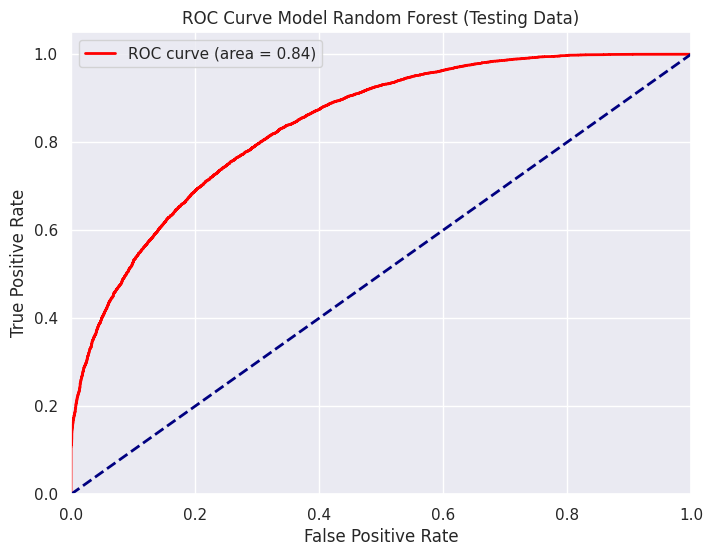

In [33]:
y_pred_prob = rf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model Random Forest (Testing Data)')
plt.legend(loc='upper left')
plt.show()

## LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2258, number of negative: 2509
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 630
[LightGBM] [Info] Number of data points in the train set: 4767, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473673 -> initscore=-0.105405
[LightGBM] [Info] Start training from score -0.105405
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4500, number of negative: 5035
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

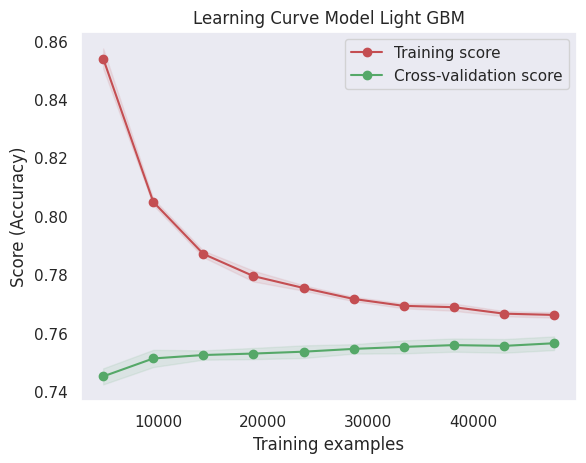

In [34]:
#Initializing Light GBM Model
light_gbm = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.05, n_estimators=100)

# Generating learning curves
# train_sizes: The proportions of the dataset to be used to generate the learning curve
# train_scores: The accuracy scores on the training sets
# test_scores: The accuracy scores on the cross-validation sets
train_sizes, train_scores, test_scores = learning_curve(light_gbm, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculating the mean and standard deviation of the training scores and the testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

#Plotting the learning curve
plt.figure()
plt.title("Learning Curve Model Light GBM")
plt.xlabel("Training examples")
plt.ylabel("Score (Accuracy)")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [35]:
#Initializing and fitting the Light GBM Model
light_gbm = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.05, n_estimators=100)
light_gbm.fit(X_train, y_train)

#Calculating the accuracy in training and testing
print("Training accuracy =", light_gbm.score(X_train, y_train))
print("Testing accuracy =", light_gbm.score(X_test, y_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 19820, number of negative: 21898
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 638
[LightGBM] [Info] Number of data points in the train set: 41718, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475095 -> initscore=-0.099704
[LightGBM] [Info] Start training from score -0.099704
Training accuracy = 0.7678699841794908
Testing accuracy = 0.7556487695749441


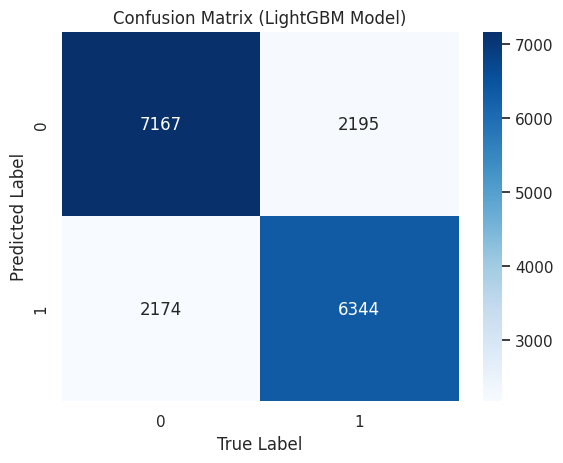

In [36]:
#Make a prediction using Ligth GBM 
y_pred = light_gbm.predict(X_test)

#Create a confusion matrix to evaluate the model
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Confusion Matrix (LightGBM Model)')
plt.show()

In [37]:
#Display the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      9362
           1       0.74      0.74      0.74      8518

    accuracy                           0.76     17880
   macro avg       0.76      0.76      0.76     17880
weighted avg       0.76      0.76      0.76     17880



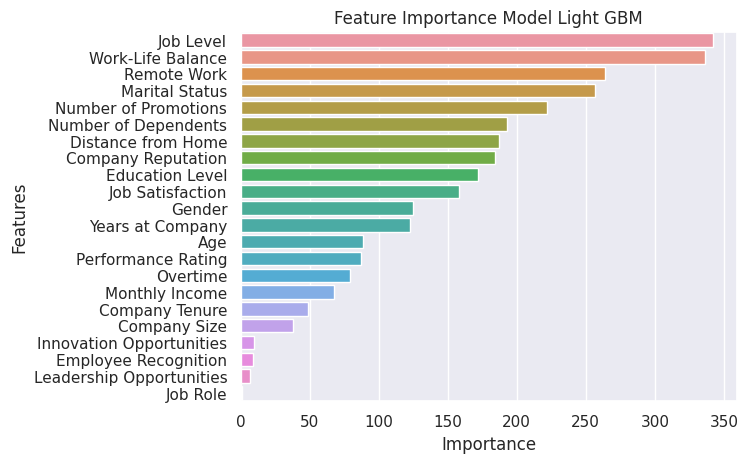

In [38]:
#Extract feature importances
imp = pd.DataFrame()
imp['Features'] = X.columns
imp['Importance'] = light_gbm.feature_importances_
imp = imp.sort_values(by='Importance', ascending=False)

#Plot the feature importances
sns.barplot(imp, y='Features', x='Importance')
plt.title("Feature Importance Model Light GBM")
plt.show()

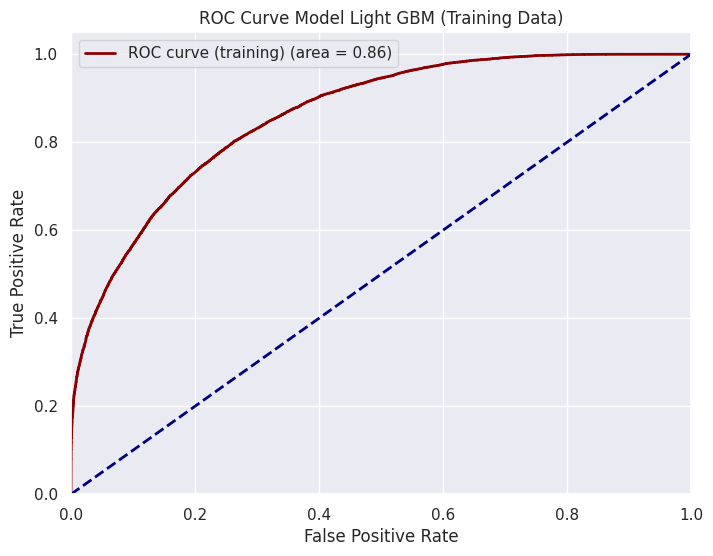

In [39]:
y_pred_prob_train = light_gbm.predict_proba(X_train)[:, 1]

fpr_train, tpr_train, _train = roc_curve(y_train, y_pred_prob_train)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkred', lw=2, label='ROC curve (training) (area = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model Light GBM (Training Data)')
plt.legend(loc='best')

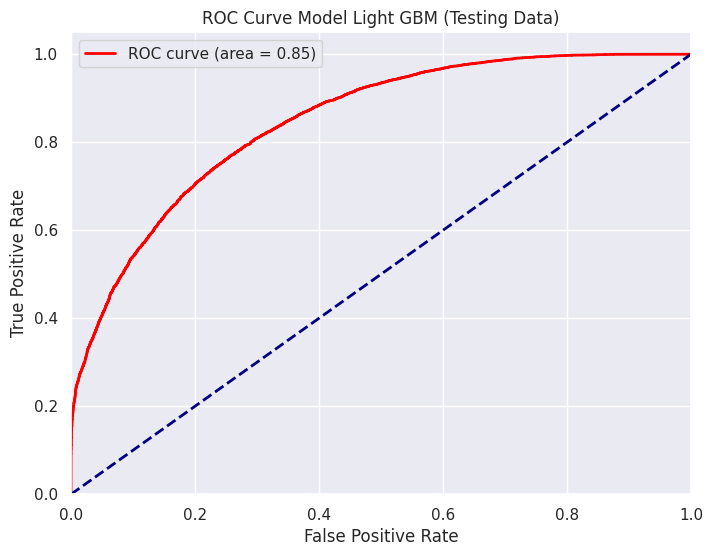

In [40]:
y_pred_prob = light_gbm.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Model Light GBM (Testing Data)')
plt.legend(loc='upper left')
plt.show()

# Conclusion

1. The models used are Decision Tree, Random Forest, and Light GBM. The three models provide very good performance and there are no overfitting problems because they work well both on training and testing data.
2. Random Forest and Light GBM perform slightly better than Decision Tree. This is proven by several higher evaluation metrics as seen in the ROC curve, learning rate, classification report, and confusion matrix.
3. After initializing a machine learning model and create a feature importance analysis, there are top four significant features which affect employee turnover. These features are job role, marital status, remote work, and work life balance which have a major influence on which have a major influence on employee resignation.